<a href="https://colab.research.google.com/github/byein/NLP_Analysis_of_Lyrics_Trend_and_WordCloud/blob/develop/NLP_Analysis_of_Lyrics_Trend_and_WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preprocessing Data
#데이터 전처리

In [2]:
!wget https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv

--2022-05-22 15:37:18--  https://raw.githubusercontent.com/walkerkq/musiclyrics/master/billboard_lyrics_1964-2015.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7953541 (7.6M) [text/plain]
Saving to: ‘billboard_lyrics_1964-2015.csv’

billboard_lyrics_19 100%[===================>]   7.58M  --.-KB/s    in 0.1s    

2022-05-22 15:37:19 (70.2 MB/s) - ‘billboard_lyrics_1964-2015.csv’ saved [7953541/7953541]



In [3]:
import numpy as np
from math import log
import matplotlib.pyplot as plt
import pandas as pd
import re
import random
import operator
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
# nltk.download('stopwords')
# nltk.download('wordnet')
nltk.download('all')
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer
from palettable.colorbrewer.qualitative import Dark2_8

# remove nan value, reset index consider the drop is true. 
# Ex) there is an array {0,nan,nan,3}, after drop the array becomes {0:0,3:3}.
#     after reset_index(drop=True), the array's index becomes {0:0,1:3}  
data = pd.read_csv("billboard_lyrics_1964-2015.csv", encoding="latin1").dropna().reset_index(drop=True)

len(data)  


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

4913

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4913 entries, 0 to 4912
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    4913 non-null   int64  
 1   Song    4913 non-null   object 
 2   Artist  4913 non-null   object 
 3   Year    4913 non-null   int64  
 4   Lyrics  4913 non-null   object 
 5   Source  4913 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 230.4+ KB


### Classify Data as the times

### 시대별 데이터 분류

In [5]:
data_60s = []
data_70s = []
data_80s = []
data_90s = []
data_00s = []
data_10s = []
cnt_60s = 0;
cnt_70s = 0;
cnt_80s = 0;
cnt_90s = 0;
cnt_00s = 0;
cnt_10s = 0;
for i, d in enumerate(data['Year']):
  if ((d >= 1960) & (d < 1970)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_60s.append(data['Lyrics'][i])  
    cnt_60s+=1
  elif ((d >= 1970) &(d < 1980)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_70s.append(data['Lyrics'][i])  
    # data_70s += data['Lyrics'][i] + ' '  
    cnt_70s+=1
  elif ((d >= 1980) &(d < 1990)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_80s.append(data['Lyrics'][i])  
    # data_80s += data['Lyrics'][i] + ' ' 
    cnt_80s+=1
  elif ((d >= 1990) &(d < 2000)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_90s.append(data['Lyrics'][i])  
    # data_90s += data['Lyrics'][i] + ' '
    cnt_90s+=1
  elif ((d >= 2000) &(d < 2010)):
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_00s.append(data['Lyrics'][i])  
    # data_00s += data['Lyrics'][i] + ' ' 
    cnt_00s+=1
  else:
    if (pd.isnull(data['Lyrics'][i])):
      break
    data_10s.append(data['Lyrics'][i])  
    # data_10s += data['Lyrics'][i] + ' ' 
    cnt_10s+=1


data_times = [data_60s, data_70s, data_80s, data_90s, data_00s, data_10s]

In [6]:
print(cnt_60s)
print(data_60s[:100])
print(cnt_70s)
print(data_70s[:100])
print(cnt_80s)
print(data_80s[:100])
print(cnt_90s)
print(data_90s[:100])
print(cnt_00s)
print(data_00s[:100])
print(cnt_10s)
print(data_10s[:100])

print(len(data_times))

474
['sam the sham miscellaneous wooly bully wooly bully sam the sham  the pharaohs  domingo samudio uno dos one two tres quatro matty told hatty about a thing she saw had two big horns and a wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take no chance lets not belseven come and learn to dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats the thing to do get you someone really to pull the wool with you wooly bully wooly bully wooly bully wooly bully wooly bully lseven  the letter l and the number 7 when typed they form a rough square l7 so the lyrics mean lets not be square', ' sugar pie honey bunch you know that i love you i cant help myself i love you and nobody elsein and out my life you come and you go leaving just your picture behind and i kissed it a thousand timeswhen you snap your finger or wink your eye i come arunning to you im tied to your apron strings and theres nothing that i can docan

## text tokenize

In [7]:
stop = stopwords.words('english')

In [8]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
def remove_encoding_word(word):
  word = str(word)
  word = word.encode('ASCII','ignore').decode('ASCII')
  return word

In [10]:
def remove_encoding_text(text):
  text = str(text)
  text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
  return text

In [11]:
#lemmatize the text
# data['Lyrics'] = data['Lyrics'].apply(remove_encoding_text)

# for dt in data_times:
clear_data60s = ([remove_encoding_text(x) for x in data_60s])
clear_data70s = ([remove_encoding_text(x) for x in data_70s])
clear_data80s = ([remove_encoding_text(x) for x in data_80s])
clear_data90s = ([remove_encoding_text(x) for x in data_90s])
clear_data00s = ([remove_encoding_text(x) for x in data_00s])
clear_data10s = ([remove_encoding_text(x) for x in data_10s])

clear_data = [clear_data60s, clear_data70s, clear_data80s, clear_data90s, clear_data00s, clear_data10s];

In [12]:
print(clear_data60s[:3])
print(clear_data70s[:3])
print(clear_data80s[:3])
print(clear_data90s[:3])
print(clear_data00s[:3])
print(clear_data10s[:3])


['sam sham miscellaneous wooly bully wooly bully sam sham pharaohs domingo samudio uno dos one two tres quatro matty told hatty thing saw two big horns wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take chance lets belseven come learn dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats thing get someone really pull wool wooly bully wooly bully wooly bully wooly bully wooly bully lseven letter l number 7 typed form rough square l7 lyrics mean lets square', 'sugar pie honey bunch know love cant help love nobody elsein life come go leaving picture behind kissed thousand timeswhen snap finger wink eye come arunning im tied apron strings theres nothing docant help cant help myselfsugar pie honey bunch im weaker man cant help im fool love seewanna tell dont love tell ive tried every time see face get choked insidewhen call name girl starts flame burning heart tearing apart matter try love cannot hidecause

In [13]:
for cd in clear_data:
  text = ' '.join(words for words in cd)
  print(len(text))
  print(text[:1000])
  

284428
sam sham miscellaneous wooly bully wooly bully sam sham pharaohs domingo samudio uno dos one two tres quatro matty told hatty thing saw two big horns wooly jaw wooly bully wooly bully wooly bully wooly bully wooly bully hatty told matty lets dont take chance lets belseven come learn dance wooly bully wooly bully wooly bully wooly bully wooly bully matty told hatty thats thing get someone really pull wool wooly bully wooly bully wooly bully wooly bully wooly bully lseven letter l number 7 typed form rough square l7 lyrics mean lets square sugar pie honey bunch know love cant help love nobody elsein life come go leaving picture behind kissed thousand timeswhen snap finger wink eye come arunning im tied apron strings theres nothing docant help cant help myselfsugar pie honey bunch im weaker man cant help im fool love seewanna tell dont love tell ive tried every time see face get choked insidewhen call name girl starts flame burning heart tearing apart matter try love cannot hidecau

In [14]:
lemma = WordNetLemmatizer().lemmatize

In [15]:
#fit into the tf-idf model
def tokenize(document):
  tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
  return tokens

In [16]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range=(1,2), stop_words=stop,strip_accents = 'unicode')

In [17]:
# setting color
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return tuple(Dark2_8.colors[random.randint(0,7)])


In [18]:
icon60s = Image.open("1960s.png")
icon70s = Image.open("1970s.png")
icon80s = Image.open("1980s.png")
icon90s = Image.open("1990s.png")
icon00s = Image.open("2000s.png")
icon10s = Image.open("2010s.png")

icons = [icon60s,icon70s,icon80s,icon90s,icon00s,icon10s]

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  % sorted(inconsistent)


  (0, 12844)	0.029227282995467802
  (0, 15087)	0.029227282995467802
  (0, 14560)	0.029227282995467802
  (0, 21976)	0.029227282995467802
  (0, 19607)	0.029227282995467802
  (0, 8196)	0.029227282995467802
  (0, 25225)	0.029227282995467802
  (0, 17142)	0.029227282995467802
  (0, 12861)	0.029227282995467802
  (0, 14528)	0.029227282995467802
  (0, 3023)	0.029227282995467802
  (0, 26978)	0.029227282995467802
  (0, 18508)	0.029227282995467802
  (0, 18934)	0.029227282995467802
  (0, 21509)	0.02739570085585376
  (0, 23818)	0.029227282995467802
  (0, 23645)	0.029227282995467802
  (0, 10221)	0.029227282995467802
  (0, 3024)	0.029227282995467802
  (0, 5103)	0.029227282995467802
  (0, 12651)	0.029227282995467802
  (0, 4351)	0.029227282995467802
  (0, 2122)	0.029227282995467802
  (0, 12831)	0.029227282995467802
  (0, 3727)	0.029227282995467802
  :	:
  (473, 13502)	0.029993013470061298
  (473, 14909)	0.22221693308722837
  (473, 26407)	0.025549285595570792
  (473, 17530)	0.05629739953111412
  (473, 27

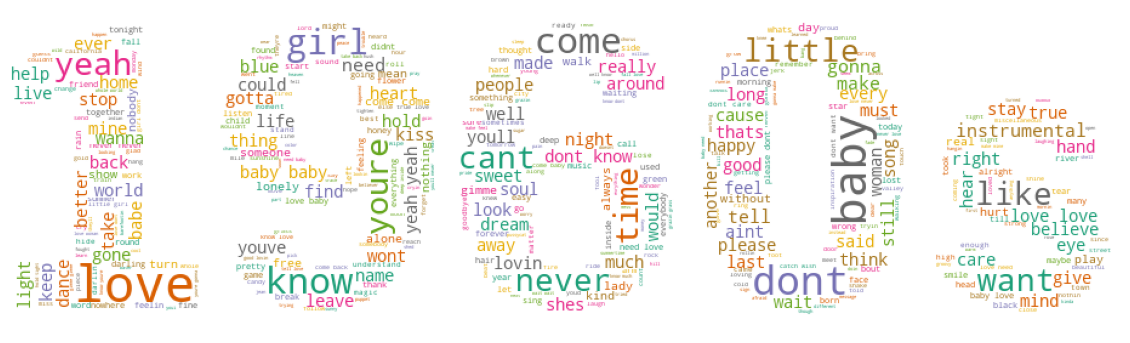

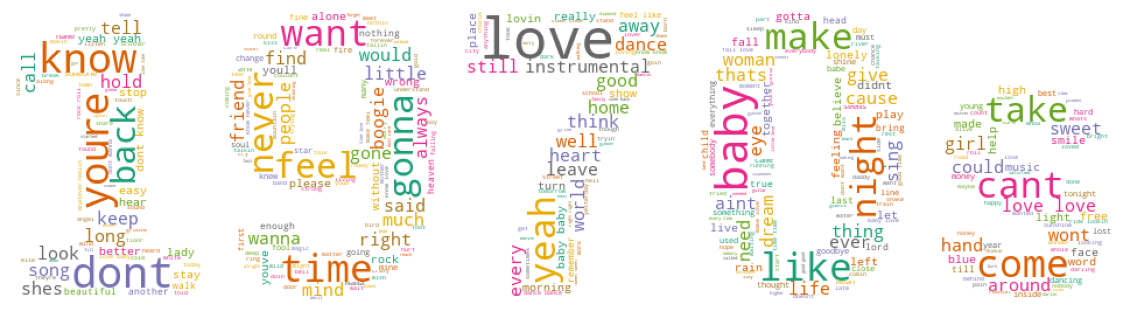

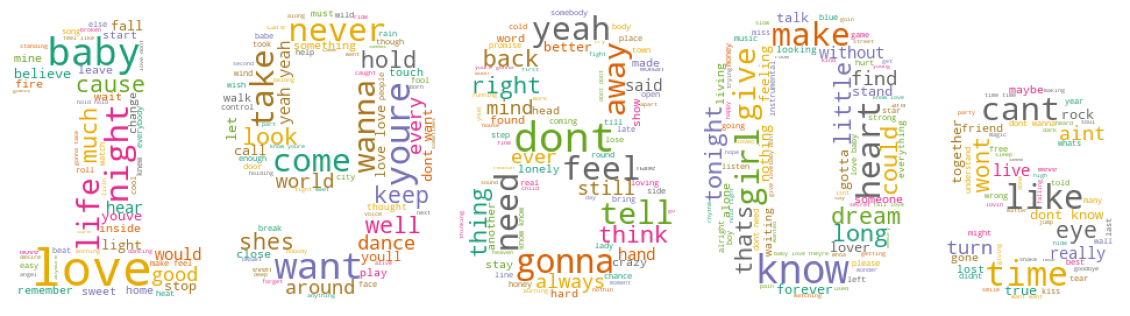

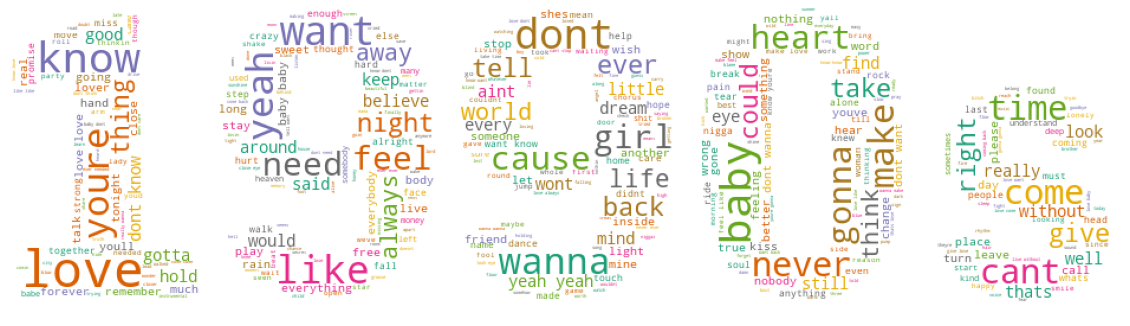

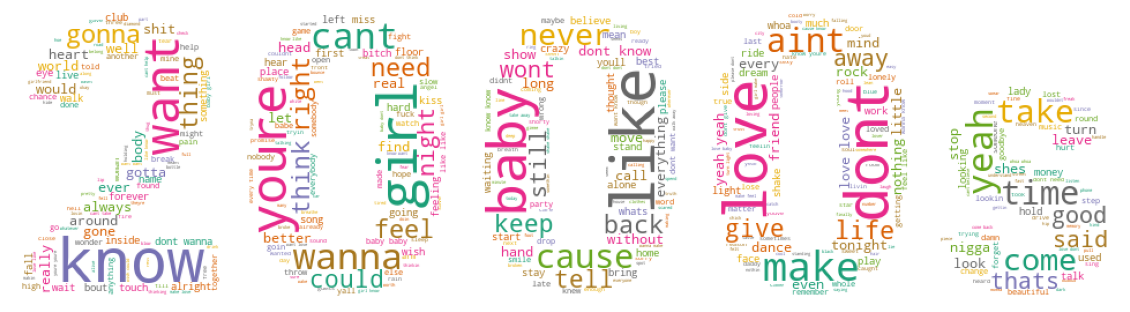

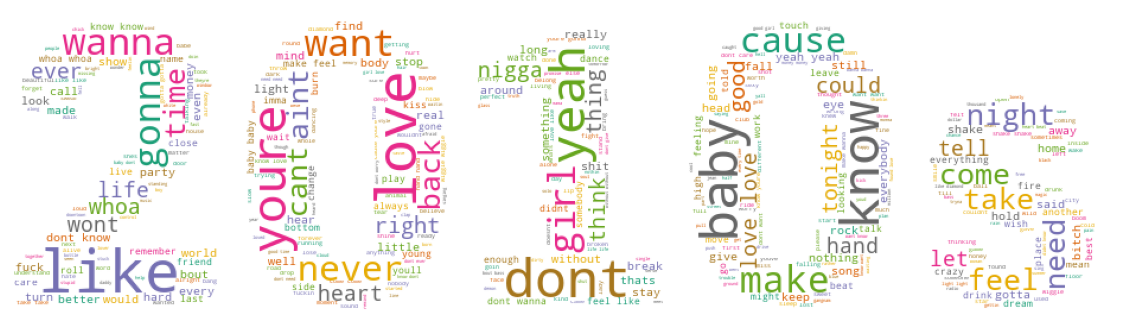

In [19]:
times = 60
i = 0
for cd in clear_data:
  tdm = vectorizer.fit_transform(cd)
  print(tdm)
  vectorizer.vocabulary_.items()
  # print(vectorizer.vocabulary_.items()[:100])
  tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
  # print(tfidf_weights[:100])
  
  sorted_tfidf_weights = (sorted(tfidf_weights, key=operator.itemgetter(1),reverse=True))
  print(sorted_tfidf_weights[:100])
  # w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))
  
  mask = Image.new("RGB", icons[i].size, (255,255,255))
  mask.paste(icons[i],icons[i])
  mask = np.array(mask)
  w = WordCloud(mask=mask, width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(sorted_tfidf_weights))
  w.recolor(color_func=color_func, random_state=3)
  
  plt.figure(figsize=(20,15))
  plt.imshow(w)
  plt.axis('off')
  plt.savefig(f'data{times:2d}s_wordcloud.png')
  times += 10
  if times > 90:
    times -= 100
  i+=1
